# Gmaps Ratings & Reviewers Analysis

## Optik di Bogor

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("optik-se-bogor.xlsx")
data.head(2)

,url,name,ratings,people,kategori,alamat,jam-layanan,foto,contact
0,https://www.google.com/maps/place/OPTIK+SEHATI...,OPTIK SEHATI BARU DRAMAGA,"2,0",(2),Toko Optik,Jl. Raya Dramaga No.37,Buka 24 jam,https://lh5.googleusercontent.com/p/AF1QipOUs6...,NaN
1,https://www.google.com/maps/place/Optik+Siloam...,Optik Siloam,"4,4",(5),Toko Optik,"Botani square, Jl. Raya Pajajaran, RT.03/RW.01",Buka 24 jam,https://lh5.googleusercontent.com/p/AF1QipMSgN...,(0251) 8400826


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          202 non-null    object
 1   name         202 non-null    object
 2   ratings      178 non-null    object
 3   people       178 non-null    object
 4   kategori     202 non-null    object
 5   alamat       200 non-null    object
 6   jam-layanan  171 non-null    object
 7   foto         91 non-null     object
 8   contact      165 non-null    object
dtypes: object(9)
memory usage: 14.3+ KB


In [ ]:
data.isnull().sum()

url              0
name             0
ratings         24
people          24
kategori         0
alamat           2
jam-layanan     31
foto           111
contact         37
dtype: int64

In [ ]:
dataClean = data[['url', 'name', 'ratings', 'people', 'kategori', 'alamat']]
dataClean = dataClean.dropna(subset = 'ratings')

In [ ]:
dataClean.duplicated().sum()

96

In [ ]:
dataClean = dataClean.drop_duplicates()
dataClean.shape

(82, 6)

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['people'] = dataClean['people'].str.replace(r'[\(\).]', '').astype(int)

In [ ]:
dataClean['ratingsPeople'] = dataClean['ratings']*dataClean['people']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsPeople'] = ((dataClean['ratingsPeople'] - dataClean['ratingsPeople'].min()) /
                                  (dataClean['ratingsPeople'].max() - dataClean['ratingsPeople'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsPeople'] = np.ceil(dataClean['ratingsPeople']).astype(int)

In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            82 non-null     object 
 1   name           82 non-null     object 
 2   ratings        82 non-null     float64
 3   people         82 non-null     int64  
 4   kategori       82 non-null     object 
 5   alamat         81 non-null     object 
 6   ratingsPeople  82 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ KB


In [ ]:
sorted_data = dataClean.sort_values(by='ratingsPeople', ascending = False).head(10)
sorted_data

,url,name,ratings,people,kategori,alamat,ratingsPeople
127,https://www.google.com/maps/place/KACAMATAMOO+...,KACAMATAMOO CIOMAS,5.0,544,Toko Kacamata Hitam,Jl. Aria Surialaga No.6a,1000
16,https://www.google.com/maps/place/Optik+Neo+-+...,Optik Neo - Bogor Junction,5.0,197,Toko Optik,"Yogya Bogor Junction, Jl. Jend. Sudirman No.11...",363
56,https://www.google.com/maps/place/Optik+Kayuma...,Optik Kayumanis Taman Yasmin,5.0,178,Toko Optik,"Taman Yasmin, Lantai 2, RT.09/RW.08",328
92,https://www.google.com/maps/place/Optik+Seis+-...,Optik Seis - AEON Mall Sentul City,4.9,128,Toko Optik,Jl. MH. Thamrin,231
29,https://www.google.com/maps/place/Optik+Kayuma...,Optik Kayumanis Plaza Jambu Dua lantai Semidas...,5.0,125,Toko Optik,"Plaza Jambu Dua, Blk. B No.50 Lantai Dasar, RT...",230
26,https://www.google.com/maps/place/Optik+Neo+-+...,Optik Neo - Cilendek Bogor,5.0,116,Toko Optik,"Ruko Samoraya Residence, Jl. Brigjen Saptadji ...",214
39,https://www.google.com/maps/place/KajaMata+Bog...,KajaMata Bogor,5.0,92,Toko Optik,"SHU Space, Jl. Merdeka No.78, RT.01/RW02/RW.02",170
37,https://www.google.com/maps/place/April+Eyewea...,April Eyewear Bogor,4.9,88,Toko Optik,Jl. Bangbarung Raya No.29,159
12,https://www.google.com/maps/place/Optik+Seis+-...,Optik Seis - Bogor Indah Plaza,4.8,85,Toko Optik,"Bogor Indah Plaza, 1st Floor, Blok I-2, Jl. Se...",151
36,https://www.google.com/maps/place/OPTIK+EZIA+%...,OPTIK EZIA (cimanggu),5.0,51,Toko Optik,"Jl. Bukit Cimanggu City Raya No.25-21, RT.06/R...",94


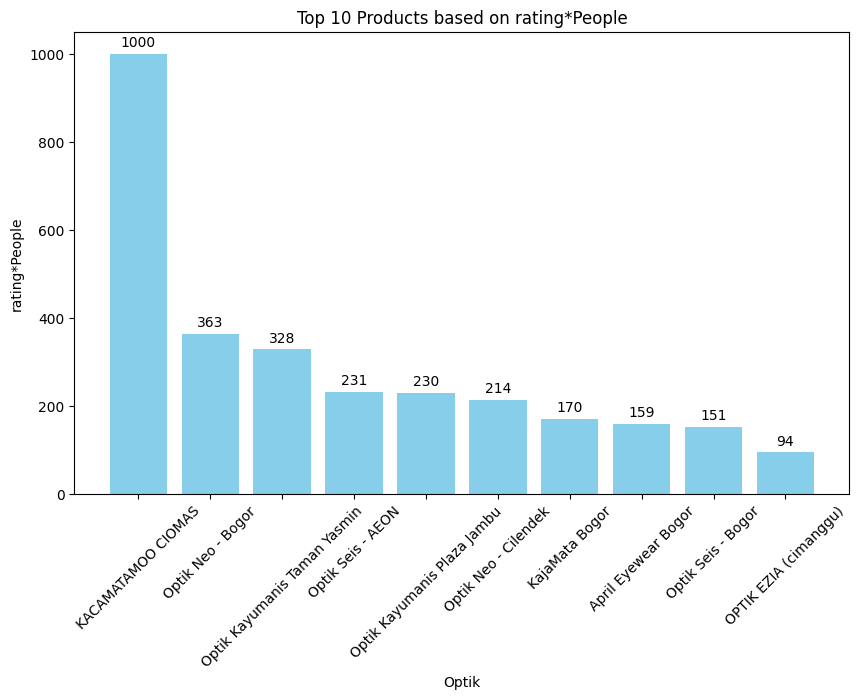

In [ ]:
import matplotlib.pyplot as plt


# Membuat barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_data['name'].apply(lambda x: ' '.join(x.split()[:4])), sorted_data['ratingsPeople'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Optik')
plt.ylabel('rating*People')
plt.title('Top 10 Products based on rating*People')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## Warung makan di Bogor

### import dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('tempat-makan-bogor.xlsx')
data.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-tutup
0,https://www.google.com/maps/place/Gurih+7+Bogo...,Gurih 7 Bogor - Saung Lesehan & Kuliner Sunda,"4,7",(30.112),Sunda,Jl. Raya Pajajaran No.102,⋅ Tutup pukul 21.30
1,https://www.google.com/maps/place/Lemongrass+R...,Lemongrass Resto,"4,4",(9.326),Masakan Asia,"Jl. Raya Pajajaran No.21, RT.03/RW.03",⋅ Tutup pukul 22.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   url        191 non-null    object
 1   nama       191 non-null    object
 2   ratings    191 non-null    object
 3   reviewers  191 non-null    object
 4   kategori   191 non-null    object
 5   alamat     191 non-null    object
 6   jam-tutup  182 non-null    object
dtypes: object(7)
memory usage: 10.6+ KB


In [ ]:
data.isnull().sum()

url          0
nama         0
ratings      0
reviewers    0
kategori     0
alamat       0
jam-tutup    9
dtype: int64

In [ ]:
dataClean = data.drop_duplicates()
dataClean.shape

(100, 7)

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['reviewers'] = dataClean['reviewers'].str.replace(r'[\(\).]', '').astype(int)

#### Jika ada nama yang sama akan ditambahkan nomor dibelakangnya

In [ ]:
dataClean['nama'].value_counts()

Kedai Kita                                       2
Gurih 7 Bogor - Saung Lesehan & Kuliner Sunda    1
Toge Goreng H. Gebro                             1
Boogie Dessert House                             1
Kedai HM                                         1
                                                ..
Tempat Makan                                     1
Saung Kuring                                     1
MP Lasagna Gulung                                1
Love Garden Resto & Cafe                         1
Sudut Temu By ToasTea                            1
Name: nama, Length: 99, dtype: int64

In [ ]:

# Hitung berapa kali setiap nilai muncul
counts = dataClean.groupby('nama').cumcount() + 1

# dataClean['nama'] = dataClean['nama'] + dataClean.groupby('nama').cumcount().replace({0: ''}).astype(str).apply(lambda x: ' ' + x)

# Tambahkan angka di belakang nilai sesuai dengan kemunculannya
dataClean['nama'] = dataClean['nama'] + counts.astype(str).apply(lambda x: ' ' + x if x != '1' else '')


#### Membuat kolom baru hasil perkalian ratings dan reviewers/100 & Standarisasi nilai dari 1 - 1000

In [ ]:
dataClean['ratingsReviewers'] = dataClean['ratings']*dataClean['reviewers']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsReviewers'] = ((dataClean['ratingsReviewers'] - dataClean['ratingsReviewers'].min()) /
                                  (dataClean['ratingsReviewers'].max() - dataClean['ratingsReviewers'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsReviewers'] = np.ceil(dataClean['ratingsReviewers']).astype(int)

In [ ]:
dataClean.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-tutup,ratingsReviewers
0,https://www.google.com/maps/place/Gurih+7+Bogo...,Gurih 7 Bogor - Saung Lesehan & Kuliner Sunda,4.7,30112,Sunda,Jl. Raya Pajajaran No.102,⋅ Tutup pukul 21.30,1000
1,https://www.google.com/maps/place/Lemongrass+R...,Lemongrass Resto,4.4,9326,Masakan Asia,"Jl. Raya Pajajaran No.21, RT.03/RW.03",⋅ Tutup pukul 22.00,291


#### Sorted Data & Tampilkan 10 descending by kolom 'ratingsReviewers'

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(10)
sortedData

,url,nama,ratings,reviewers,kategori,alamat,jam-tutup,ratingsReviewers
0,https://www.google.com/maps/place/Gurih+7+Bogo...,Gurih 7 Bogor - Saung Lesehan & Kuliner Sunda,4.7,30112,Sunda,Jl. Raya Pajajaran No.102,⋅ Tutup pukul 21.30,1000
19,https://www.google.com/maps/place/RM.+Bumi+Aki...,RM. Bumi Aki Bogor,4.7,16930,Sunda,"Jl. Raya Pajajaran No.51, RT.04/RW.13",⋅ Tutup pukul 22.00,563
89,https://www.google.com/maps/place/Shabu+Hachi/...,Shabu Hachi,4.8,12542,Jepang,Jl. Raya Pajajaran No.75,⋅ Tutup pukul 21.00,426
14,https://www.google.com/maps/place/Kedai+Kita/d...,Kedai Kita,4.5,12222,Sesuai untuk keluarga,Jl. Pangrango No.21,⋅ Tutup pukul 22.00,390
27,https://www.google.com/maps/place/Kluwih+Sunda...,Kluwih Sunda,4.5,11109,Sunda,"Jl. Bina Marga No.12, RT.04/RW.11",⋅ Tutup pukul 21.00,354
12,https://www.google.com/maps/place/De%27+Leuit+...,De' Leuit Sensasi Nasi Jambal,4.4,9768,Sunda,"Jl. Pakuan No.3, RT.04/RW.11",⋅ Tutup pukul 20.30,305
1,https://www.google.com/maps/place/Lemongrass+R...,Lemongrass Resto,4.4,9326,Masakan Asia,"Jl. Raya Pajajaran No.21, RT.03/RW.03",⋅ Tutup pukul 22.00,291
25,https://www.google.com/maps/place/Macaroni+Pan...,Macaroni Panggang,4.5,8474,Restoran,"Jl. Salak Jl. Sangga Buana No.24, RT.03/RW.04",⋅ Tutup pukul 22.00,271
30,https://www.google.com/maps/place/Saung+Kuring...,Saung Kuring,4.5,8500,Sunda,"Jl. Sholeh Iskandar No.9, RT.04/RW.11",⋅ Tutup pukul 20.30,271
4,https://www.google.com/maps/place/Gumati+Resto...,Gumati Resto Khas Sunda,4.5,7220,Restoran,"Jl. Paledang No.26 & 28, RT.05/RW.07",⋅ Tutup pukul 22.00,231


#### Visualisasi

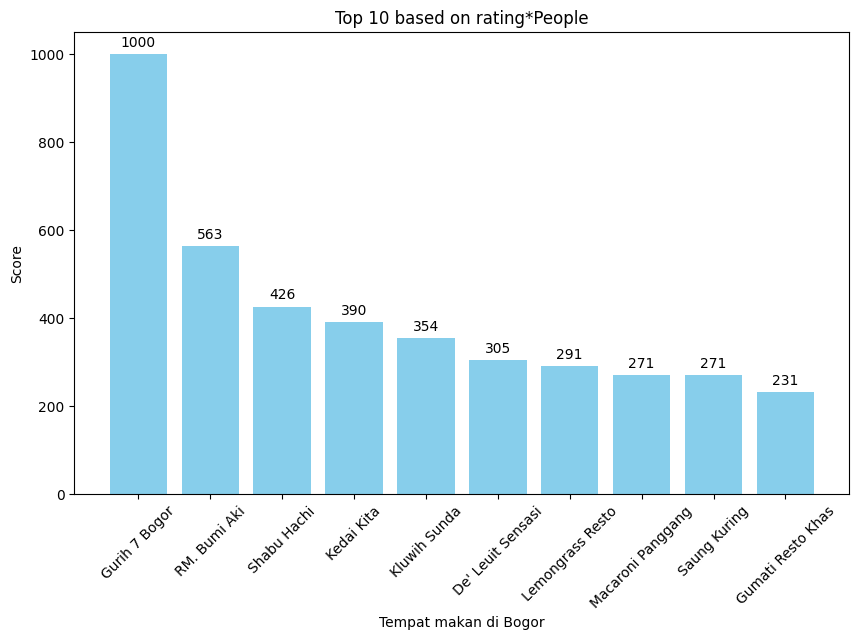

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))

#-------------------------------------------------------------------vvv------Ambil 3 kata pada kolom nama
bars = plt.bar(sortedData['nama'].apply(lambda x: ' '.join(x.split()[:3])), sortedData['ratingsReviewers'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Tempat makan di Bogor')
plt.ylabel('Score')
plt.title('Top 10 based on rating*People')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## Tempat makan di Dramaga

### import dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('tempat-makan-dramaga-repair.xlsx')
data.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional
0,https://www.google.com/maps/place/Rumah+Makan+...,Rumah Makan Cak Joyo,"4,7",(186),Ayam,"Jl. Babakan Tengah No.1, RT.01/RW.09",⋅ Tutup pukul 22.30
1,https://www.google.com/maps/place/Rumah+Makan+...,Rumah Makan Galuga Dramaga,"4,2",(830),Sunda,"Jl. Sawah Baru No.RT 01/ 01, RT.001/RW.001",⋅ Tutup pukul 21.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              189 non-null    object
 1   nama             189 non-null    object
 2   ratings          183 non-null    object
 3   reviewers        183 non-null    object
 4   kategori         189 non-null    object
 5   alamat           187 non-null    object
 6   jam-opearsional  169 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [ ]:
dataClean = data.drop_duplicates()
dataClean.shape

(90, 7)

In [ ]:
dataClean.isnull().sum()

url                 0
nama                0
ratings             0
reviewers           0
kategori            0
alamat              1
jam-opearsional    10
dtype: int64

In [ ]:
dataClean = dataClean.dropna(subset = 'ratings')

In [ ]:
dataClean.isnull().sum()

url                 0
nama                0
ratings             0
reviewers           0
kategori            0
alamat              1
jam-opearsional    10
dtype: int64

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['reviewers'] = dataClean['reviewers'].str.replace(r'[\(\).]', '').astype(int)

#### Jika ada nama yang sama akan ditambahkan nomor dibelakangnya

In [ ]:
dataClean['nama'].value_counts()

Rumah Makan Cak Joyo                               1
HOKBEN KITCHEN DRAMAGA BOGOR                       1
Kim Bo-Im Korean Street Food Dramaga               1
Cucurak Warung Sunda                               1
Kebuli Abuya Dramaga                               1
                                                  ..
Rm. Sote (Rumah Makan Soto Si Teteh)               1
Mie Ayam Bakso Pak Lesus Pangkalan Kampus Dalam    1
RM. Khas Sunda Ibu Ubed                            1
Rumah Makan Askil                                  1
Empal Gentong Mang Ule Dramaga                     1
Name: nama, Length: 87, dtype: int64

In [ ]:

# Hitung berapa kali setiap nilai muncul
counts = dataClean.groupby('nam1').cumcount() + 1

# dataClean['nam1'] = dataClean['nam1'] + dataClean.groupby('nam1').cumcount().replace({0: ''}).astype(str).apply(lambda x: ' ' + x)

# Tambahkan angka di belakang nilai sesuai dengan kemunculannya
dataClean['nam1'] = dataClean['nam1'] + counts.astype(str).apply(lambda x: ' ' + x if x != '1' else '')


#### Membuat kolom baru hasil perkalian ratings dan reviewers/100 & Standarisasi nilai dari 1 - 1000

In [ ]:
dataClean['ratingsReviewers'] = dataClean['ratings']*dataClean['reviewers']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsReviewers'] = ((dataClean['ratingsReviewers'] - dataClean['ratingsReviewers'].min()) /
                                  (dataClean['ratingsReviewers'].max() - dataClean['ratingsReviewers'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsReviewers'] = np.ceil(dataClean['ratingsReviewers']).astype(int)

In [ ]:
dataClean.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional,ratingsReviewers
0,https://www.google.com/maps/place/Rumah+Makan+...,Rumah Makan Cak Joyo,4.7,186,Ayam,"Jl. Babakan Tengah No.1, RT.01/RW.09",⋅ Tutup pukul 22.30,42
1,https://www.google.com/maps/place/Rumah+Makan+...,Rumah Makan Galuga Dramaga,4.2,830,Sunda,"Jl. Sawah Baru No.RT 01/ 01, RT.001/RW.001",⋅ Tutup pukul 21.00,165


#### Sorted Data & Tampilkan 10 descending by kolom 'ratingsReviewers'

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(10)
sortedData

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional,ratingsReviewers
54,https://www.google.com/maps/place/Sambal+Bakar...,"Sambal Bakar Indonesia, Dramaga IPB Bogor",4.9,4345,Indonesia,"Jl. Raya Cibungbulang - Bogor No.41, RT.01/RW.01",⋅ Tutup pukul 00.00,1000
48,https://www.google.com/maps/place/Richeese+Fac...,Richeese Factory Dramaga,4.4,2686,Ayam,"Jl. Raya Dramaga No.24, RT.03/RW.02",⋅ Tutup pukul 22.00,556
10,https://www.google.com/maps/place/Tepi+Danau+C...,Tepi Danau Cafe and Resto,4.2,2419,Restoran,NaN,⋅ Tutup pukul 22.00,478
92,https://www.google.com/maps/place/Sawah+Abah+B...,Sawah Abah Bogor - Ikan Bakar Dalam Bambu,4.5,1838,Restoran,Jl. Lkr. Dramaga No.16,⋅ Tutup pukul 21.00,390
6,https://www.google.com/maps/place/Bebeke+Om+Ar...,Bebeke Om Aris Dramaga,4.6,1629,Restoran,"Jl Raya Dramaga Km.7 No.2, RT.03/RW.03",⋅ Tutup pukul 21.00,353
90,https://www.google.com/maps/place/McDonald%27s...,McDonald's Dramaga,4.6,1236,Makanan Siap Saji,"Jl. Raya Dramaga, RT.01/RW.01",⋅ Tutup pukul 00.00,268
4,https://www.google.com/maps/place/serbasambald...,serbasambaldramaga,4.3,1166,Indonesia,Jl. Raya Dramaga No.km7 3,⋅ Tutup pukul 22.00,237
20,https://www.google.com/maps/place/Chick+N+Tea+...,Chick N Tea Resto Pusat,4.5,1069,Makanan Siap Saji,Jl. Raya Dramaga - Bogor No.KM. 7,NaN,227
88,https://www.google.com/maps/place/Cucurak+Waru...,Cucurak Warung Sunda,4.1,1024,Indonesia,Jl. Raya Dramaga Caringin No.Km. 7,⋅ Tutup pukul 21.00,198
5,https://www.google.com/maps/place/Parahyangan+...,Parahyangan Warung Sunda,4.3,924,Restoran,Jl. Raya Dramaga No.16,⋅ Tutup pukul 22.00,188


#### Visualisasi

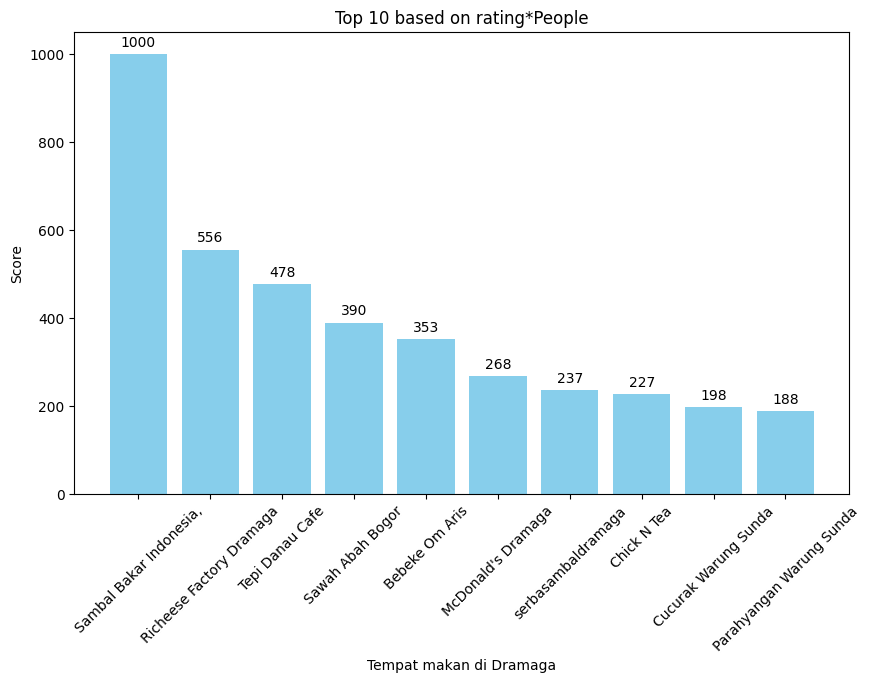

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))

#-------------------------------------------------------------------vvv------Ambil 3 kata pada kolom nama
bars = plt.bar(sortedData['nama'].apply(lambda x: ' '.join(x.split()[:3])), sortedData['ratingsReviewers'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Tempat makan di Dramaga')
plt.ylabel('Score')
plt.title('Top 10 based on rating*People')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## Tempat Nongkrong-Ngopi

### import dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('nongkrong-dramaga-kombined.xlsx')
data.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional
0,https://www.google.com/maps/place/Cafe+Taman+D...,Cafe Taman Dramaga,"4,0",(194),Restoran,"Jl. Raya Dramaga No.Km 7, RT.03/RW.1RT01",⋅ Buka pukul 11.00
1,https://www.google.com/maps/place/Tepi+Danau+C...,Tepi Danau Cafe and Resto,"4,2",(2.421),Kafe,NaN,⋅ Buka pukul 11.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              406 non-null    object
 1   nama             406 non-null    object
 2   ratings          406 non-null    object
 3   reviewers        406 non-null    object
 4   kategori         406 non-null    object
 5   alamat           389 non-null    object
 6   jam-opearsional  333 non-null    object
dtypes: object(7)
memory usage: 22.3+ KB


In [ ]:
dataClean = data.drop_duplicates()
dataClean.shape

(132, 7)

In [ ]:
dataClean.isnull().sum()

url                 0
nama                0
ratings             0
reviewers           0
kategori            0
alamat              5
jam-opearsional    25
dtype: int64

In [ ]:
dataClean = dataClean.dropna(subset = 'ratings')

In [ ]:
dataClean.isnull().sum()

url                 0
nama                0
ratings             0
reviewers           0
kategori            0
alamat              4
jam-opearsional    20
dtype: int64

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['reviewers'] = dataClean['reviewers'].str.replace(r'[\(\).]', '').astype(int)

#### Jika ada nama yang sama akan ditambahkan nomor dibelakangnya

In [ ]:
dataClean['nama'].value_counts().head(5)

Warkop Bateng 2                              2
Cafe Taman Dramaga                           1
Angkringan Dramaga - Happy Feel Rest Area    1
Coto Makassar Daeng Awa                      1
Warung Serba Sambal GSV                      1
Name: nama, dtype: int64

In [ ]:

# Hitung berapa kali setiap nilai muncul
counts = dataClean.groupby('nama').cumcount() + 1

# dataClean['nama'] = dataClean['nama'] + dataClean.groupby('nama').cumcount().replace({0: ''}).astype(str).apply(lambda x: ' ' + x)

# Tambahkan angka di belakang nilai sesuai dengan kemunculannya
dataClean['nama'] = dataClean['nama'] + counts.astype(str).apply(lambda x: ' ' + x if x != '1' else '')


#### Membuat kolom baru hasil perkalian ratings dan reviewers & Standarisasi nilai dari 1 - 1000

In [ ]:
dataClean['ratingsReviewers'] = dataClean['ratings']*dataClean['reviewers']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsReviewers'] = ((dataClean['ratingsReviewers'] - dataClean['ratingsReviewers'].min()) /
                                  (dataClean['ratingsReviewers'].max() - dataClean['ratingsReviewers'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsReviewers'] = np.ceil(dataClean['ratingsReviewers']).astype(int)

In [ ]:
dataClean.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional,ratingsReviewers
0,https://www.google.com/maps/place/Cafe+Taman+D...,Cafe Taman Dramaga,4.0,194,Restoran,"Jl. Raya Dramaga No.Km 7, RT.03/RW.1RT01",⋅ Buka pukul 11.00,36
1,https://www.google.com/maps/place/Tepi+Danau+C...,Tepi Danau Cafe and Resto,4.2,2421,Kafe,NaN,⋅ Buka pukul 11.00,462


#### Sorted Data & Tampilkan 10 descending by kolom 'ratingsReviewers'

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(15)
sortedData

,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional,ratingsReviewers
3,https://www.google.com/maps/place/RUMAH+KOPI+R...,RUMAH KOPI RANIN,4.6,3095,Kedai Kopi,Jl. Alternatif IPB Desa,⋅ Buka pukul 10.00,646
1,https://www.google.com/maps/place/Tepi+Danau+C...,Tepi Danau Cafe and Resto,4.2,2421,Kafe,NaN,⋅ Buka pukul 11.00,462
59,https://www.google.com/maps/place/Kedai+Kopi+S...,Kedai Kopi Saring (kedai saring),4.4,1584,Kafe,"Ruko simpang 4 No. 27 A Yasmin, Jl. KH. R. Abd...",⋅ Buka pukul 06.00,317
58,https://www.google.com/maps/place/Hutan+Hujan+...,Hutan Hujan (Coffee Shop),4.8,729,Kafe,RT.03/RW.02,⋅ Buka pukul 09.00,160
55,https://www.google.com/maps/place/Sisi+Barat+C...,Sisi Barat Coffee,4.5,754,Kedai Kopi,"Jl. Batu Hulung, RT.02/RW.02",⋅ Buka pukul 10.00,155
35,https://www.google.com/maps/place/La+Terra+del...,La Terra del café Bogor,4.4,707,Kedai Kopi,Jl. Raya Dramaga No.1,⋅ Buka pukul 07.30,142
5,https://www.google.com/maps/place/Dakara+Coffe...,Dakara Coffee - Cafe & Resto,4.5,593,Kafe,Jl. Lingkar Baru laladon Dramaga IPB Bogor No. 9,⋅ Buka pukul 07.00,122
65,https://www.google.com/maps/place/Warung+Can+N...,Warung Can Ngopi,4.5,521,Kedai Kopi,"Ruko Samoraya Residence, Jl. Brigjen Saptadji ...",⋅ Buka pukul 14.00,107
2,https://www.google.com/maps/place/Kopicentrum/...,Kopicentrum,4.4,464,Kafe,Jl. Babakan Tengah No.5,⋅ Buka pukul 09.00,94
159,https://www.google.com/maps/place/Kafe+Student...,Kafe Studente Yasmin,4.8,408,Kedai Kopi,"Ringroad Utara, Jl. KH. R. Abdullah Bin Nuh Jl...",⋅ Buka pukul 09.00,90


In [ ]:
dataClean = dataClean.drop([59])

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(10)
sortedData


,url,nama,ratings,reviewers,kategori,alamat,jam-opearsional,ratingsReviewers
3,https://www.google.com/maps/place/RUMAH+KOPI+R...,RUMAH KOPI RANIN,4.6,3095,Kedai Kopi,Jl. Alternatif IPB Desa,⋅ Buka pukul 10.00,646
1,https://www.google.com/maps/place/Tepi+Danau+C...,Tepi Danau Cafe and Resto,4.2,2421,Kafe,NaN,⋅ Buka pukul 11.00,462
58,https://www.google.com/maps/place/Hutan+Hujan+...,Hutan Hujan (Coffee Shop),4.8,729,Kafe,RT.03/RW.02,⋅ Buka pukul 09.00,160
55,https://www.google.com/maps/place/Sisi+Barat+C...,Sisi Barat Coffee,4.5,754,Kedai Kopi,"Jl. Batu Hulung, RT.02/RW.02",⋅ Buka pukul 10.00,155
35,https://www.google.com/maps/place/La+Terra+del...,La Terra del café Bogor,4.4,707,Kedai Kopi,Jl. Raya Dramaga No.1,⋅ Buka pukul 07.30,142
5,https://www.google.com/maps/place/Dakara+Coffe...,Dakara Coffee - Cafe & Resto,4.5,593,Kafe,Jl. Lingkar Baru laladon Dramaga IPB Bogor No. 9,⋅ Buka pukul 07.00,122
2,https://www.google.com/maps/place/Kopicentrum/...,Kopicentrum,4.4,464,Kafe,Jl. Babakan Tengah No.5,⋅ Buka pukul 09.00,94
46,https://www.google.com/maps/place/Starbucks+Dr...,Starbucks Dramaga,4.7,399,Kedai Kopi,RT.01/RW.06,⋅ Buka pukul 09.00,86
53,https://www.google.com/maps/place/RUMAH+MATOA+...,RUMAH MATOA Coffee & Kitchen,4.7,366,Kedai Kopi,"Alternative IPB - Samping BMKG, Jl. Cilubang M...",⋅ Buka pukul 09.00,79
222,https://www.google.com/maps/place/Warkop+Tampo...,Warkop Tampomas,4.6,347,Restoran,"CPQJ+2VJ, Jl. Babakan Raya",NaN,74


#### Visualisasi

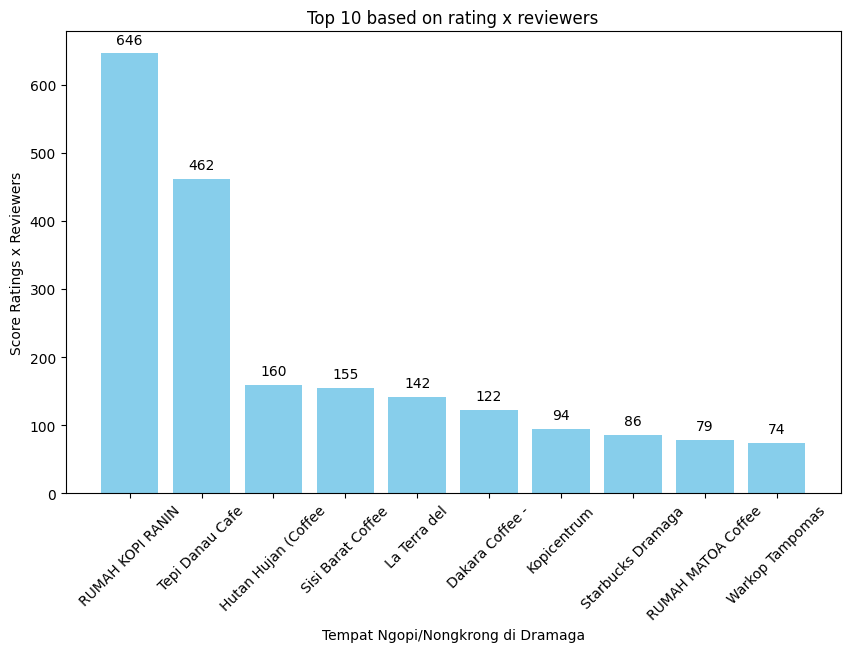

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))

#-------------------------------------------------------------------vvv------Ambil 3 kata pada kolom nama
bars = plt.bar(sortedData['nama'].apply(lambda x: ' '.join(x.split()[:3])), sortedData['ratingsReviewers'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Tempat Ngopi/Nongkrong di Dramaga')
plt.ylabel('Score Ratings x Reviewers')
plt.title('Top 10 based on rating x reviewers')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## Pangkas Rambut di Bogor

### import dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('pangkas-rambut-bogor-repair.xlsx')
data.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-operasional
0,https://www.google.com/maps/place/Pangkas+Ramb...,Pangkas Rambut BOGEL,"4,9",(20),Tempat Cukur Rambut,"Gg. Swadaya I No.34, RT.02/RW.05",NaN
1,https://www.google.com/maps/place/Pangkas+Ramb...,Pangkas Rambut Sartika,"4,8",(35),Tempat Cukur Rambut,"CQFC+5X3, Jl. DR. Sumeru, RT.01/RW.09",⋅ Tutup pukul 21.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              96 non-null     object
 1   nama             96 non-null     object
 2   ratings          96 non-null     object
 3   reviewers        96 non-null     object
 4   kategori         96 non-null     object
 5   alamat           96 non-null     object
 6   jam-operasional  93 non-null     object
dtypes: object(7)
memory usage: 5.4+ KB


In [ ]:
dataClean = data.drop_duplicates()
dataClean.shape

(50, 7)

In [ ]:
dataClean.isnull().sum()

url                0
nama               0
ratings            0
reviewers          0
kategori           0
alamat             0
jam-operasional    2
dtype: int64

In [ ]:
dataClean = dataClean.dropna(subset = 'ratings')

In [ ]:
dataClean.isnull().sum()

url                 0
nama                0
ratings             0
reviewers           0
kategori            0
alamat              1
jam-opearsional    10
dtype: int64

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['reviewers'] = dataClean['reviewers'].str.replace(r'[\(\).]', '').astype(int)

#### Jika ada nama yang sama akan ditambahkan nomor dibelakangnya

In [ ]:
dataClean['nama'].value_counts().head(5)

CAPTAIN BARBERSHOP            3
Pangkas Rambut Putra Asgar    2
Pangkas Rambut BOGEL          1
Barber Preneur                1
Pangkas Rambut Pendhowo       1
Name: nama, dtype: int64

In [ ]:

# Hitung berapa kali setiap nilai muncul
counts = dataClean.groupby('nama').cumcount() + 1

# dataClean['nama'] = dataClean['nama'] + dataClean.groupby('nama').cumcount().replace({0: ''}).astype(str).apply(lambda x: ' ' + x)

# Tambahkan angka di belakang nilai sesuai dengan kemunculannya
dataClean['nama'] = dataClean['nama'] + counts.astype(str).apply(lambda x: ' ' + x if x != '1' else '')


#### Membuat kolom baru hasil perkalian ratings dan reviewers/100 & Standarisasi nilai dari 1 - 1000

In [ ]:
dataClean['ratingsReviewers'] = dataClean['ratings']*dataClean['reviewers']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsReviewers'] = ((dataClean['ratingsReviewers'] - dataClean['ratingsReviewers'].min()) /
                                  (dataClean['ratingsReviewers'].max() - dataClean['ratingsReviewers'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsReviewers'] = np.ceil(dataClean['ratingsReviewers']).astype(int)

In [ ]:
dataClean.head(2)

,url,nama,ratings,reviewers,kategori,alamat,jam-operasional,ratingsReviewers
0,https://www.google.com/maps/place/Pangkas+Ramb...,Pangkas Rambut BOGEL,4.9,20,Tempat Cukur Rambut,"Gg. Swadaya I No.34, RT.02/RW.05",NaN,24
1,https://www.google.com/maps/place/Pangkas+Ramb...,Pangkas Rambut Sartika,4.8,35,Tempat Cukur Rambut,"CQFC+5X3, Jl. DR. Sumeru, RT.01/RW.09",⋅ Tutup pukul 21.00,46


#### Sorted Data & Tampilkan 10 descending by kolom 'ratingsReviewers'

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(10)
sortedData

,url,nama,ratings,reviewers,kategori,alamat,jam-operasional,ratingsReviewers
80,https://www.google.com/maps/place/CAPTAIN+BARB...,CAPTAIN BARBERSHOP 3,4.7,682,Tempat Cukur Rambut,Jl. Achmad Sobana Jl. Bangbarung Raya No.6D,⋅ Tutup pukul 21.00,1000
26,https://www.google.com/maps/place/CAPTAIN+BARB...,CAPTAIN BARBERSHOP 2,4.6,646,Tempat Cukur Rambut,"Jl. Pahlawan No.189B, RT.03/RW.14",⋅ Tutup pukul 21.00,927
2,https://www.google.com/maps/place/CAPTAIN+BARB...,CAPTAIN BARBERSHOP,4.7,559,Tempat Cukur Rambut,"Jl. Raya Semplak No.36, RT.01/RW.01",⋅ Tutup pukul 21.00,819
14,https://www.google.com/maps/place/GoodFellas+B...,GoodFellas Barbershop BOGOR 2,4.9,423,Tempat Cukur Rambut,Jl. KH. R. Abdullah Bin Nuh No.33 - 35 Lantai 2,⋅ Tutup pukul 21.00,645
37,https://www.google.com/maps/place/ManDatory+Th...,ManDatory The Barberclub,4.7,336,Tempat Cukur Rambut,"Ruko Villa Indah Pajajaran, Ruko VIP Blok AC, ...",⋅ Tutup pukul 21.00,490
79,https://www.google.com/maps/place/Barbershop+B...,Barbershop Baileys,4.6,292,Tempat Cukur Rambut,"Jl. Raya Parung Banteng No.05, RT.01/RW.02",⋅ Tutup pukul 21.00,416
17,https://www.google.com/maps/place/Dills+Barber...,Dills Barbershop,4.7,174,Tempat Cukur Rambut,"Jl. Sindang Barang Pengkolan No.138, RT.05/RW.02",⋅ Tutup pukul 20.30,251
10,https://www.google.com/maps/place/Doel%27s+Bar...,Doel's Barber Shop,4.5,144,Tempat Cukur Rambut,Jl. Raya Dramaga No.263,⋅ Tutup pukul 22.00,197
38,https://www.google.com/maps/place/Sniff+Barber...,Sniff Barbershop,4.7,125,Tempat Cukur Rambut,Jl. Kol. Ahmad Syam No.8,⋅ Tutup pukul 20.50,178
20,https://www.google.com/maps/place/VIP+1+Pangka...,VIP 1 Pangkas Rambut,4.5,128,Tempat Cukur Rambut,"Jl. Bangbarung Raya No.6, RT.01/RW.07",⋅ Tutup pukul 20.30,175


#### Visualisasi

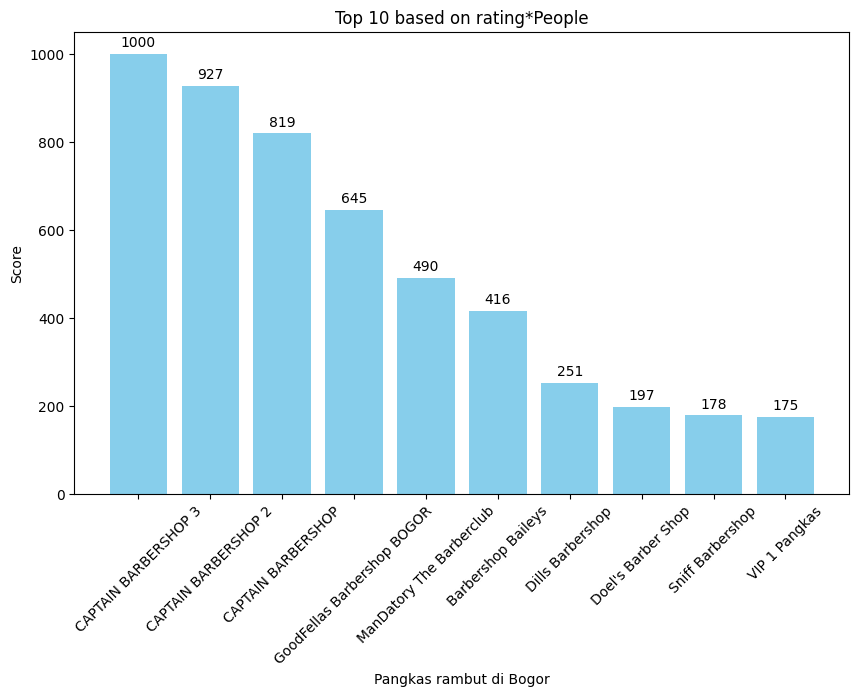

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))

#-------------------------------------------------------------------vvv------Ambil 3 kata pada kolom nama
bars = plt.bar(sortedData['nama'].apply(lambda x: ' '.join(x.split()[:3])), sortedData['ratingsReviewers'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Pangkas rambut di Bogor')
plt.ylabel('Score')
plt.title('Top 10 based on rating*People')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## Tempat wisata di Bogor

### import dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('tempat-wisata-bogor-repair.xlsx')
data.head(2)

,url,nama,ratings,reviewers,kategori,alamat,FQ2IWe src
0,https://www.google.com/maps/place/Taman+Heulan...,Taman Heulang,"4,6",(10.884),Tujuan Wisata,"CRJ2+4W7, Jl. Heulang, RT.06/RW.04",NaN
1,https://www.google.com/maps/place/ECOART+PARK+...,ECOART PARK Sentul City,"4,3",(11.131),Tujuan Wisata,CRJW+G86,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         339 non-null    object
 1   nama        339 non-null    object
 2   ratings     335 non-null    object
 3   reviewers   335 non-null    object
 4   kategori    337 non-null    object
 5   alamat      299 non-null    object
 6   FQ2IWe src  147 non-null    object
dtypes: object(7)
memory usage: 18.7+ KB


In [ ]:
dataClean = data.drop_duplicates(subset= 'url')
dataClean.shape

(151, 7)

In [ ]:
dataClean.isnull().sum()

url             0
nama            0
ratings         2
reviewers       2
kategori        1
alamat         20
FQ2IWe src    127
dtype: int64

In [ ]:
dataClean = dataClean.dropna(subset = 'ratings')

In [ ]:
dataClean = dataClean[['url', 'nama', 'ratings', 'reviewers', 'kategori', 'alamat']]

In [ ]:
dataClean.isnull().sum()

url           0
nama          0
ratings       0
reviewers     0
kategori      1
alamat       20
dtype: int64

In [ ]:
dataClean['ratings'] = dataClean['ratings'].str.replace(',', '.').astype(float)
dataClean['reviewers'] = dataClean['reviewers'].str.replace(r'[\(\).]', '').astype(int)

#### Jika ada nama yang sama akan ditambahkan nomor dibelakangnya

In [ ]:
dataClean['nama'].value_counts().head(10)

Taman Heulang                         1
Taman Wisata Curug Nangka             1
Curug Seribu                          1
Kebun Raya Cibinong                   1
Kebun Teh Cirangsad                   1
Pawaja (Panorama Alam Wangunjaya )    1
Telaga Batu                           1
Pondok Wijaya wisata bogor            1
Tempat Wisata Curug Suakan Rumpin     1
Cakrawala Nuansa Nirwana              1
Name: nama, dtype: int64

In [ ]:

# Hitung berapa kali setiap nilai muncul
counts = dataClean.groupby('nama').cumcount() + 1

# dataClean['nama'] = dataClean['nama'] + dataClean.groupby('nama').cumcount().replace({0: ''}).astype(str).apply(lambda x: ' ' + x)

# Tambahkan angka di belakang nilai sesuai dengan kemunculannya
dataClean['nama'] = dataClean['nama'] + counts.astype(str).apply(lambda x: ' ' + x if x != '1' else '')


#### Membuat kolom baru hasil perkalian ratings dan reviewers/100 & Standarisasi nilai dari 1 - 1000

In [ ]:
dataClean['ratingsReviewers'] = dataClean['ratings']*dataClean['reviewers']

# Tentukan rentang baru (1-1000)
new_min = 1
new_max = 1000

# Normalisasi dengan min-max scaling
dataClean['ratingsReviewers'] = ((dataClean['ratingsReviewers'] - dataClean['ratingsReviewers'].min()) /
                                  (dataClean['ratingsReviewers'].max() - dataClean['ratingsReviewers'].min())) * (new_max - new_min) + new_min


import numpy as np
dataClean['ratingsReviewers'] = np.ceil(dataClean['ratingsReviewers']).astype(int)

In [ ]:
dataClean.head(2)

,url,nama,ratings,reviewers,kategori,alamat,ratingsReviewers
0,https://www.google.com/maps/place/Taman+Heulan...,Taman Heulang,4.6,10884,Tujuan Wisata,"CRJ2+4W7, Jl. Heulang, RT.06/RW.04",113
1,https://www.google.com/maps/place/ECOART+PARK+...,ECOART PARK Sentul City,4.3,11131,Tujuan Wisata,CRJW+G86,108


#### Sorted Data & Tampilkan 10 descending by kolom 'ratingsReviewers'

In [ ]:
sortedData = dataClean.sort_values(by = 'ratingsReviewers', ascending = False).head(10)
sortedData

,url,nama,ratings,reviewers,kategori,alamat,ratingsReviewers
11,https://www.google.com/maps/place/Kebun+Raya+B...,Kebun Raya Bogor,4.7,95430,Tujuan Wisata,Jl. Ir. H. Juanda No.13,1000
272,https://www.google.com/maps/place/Taman+Safari...,Taman Safari Indonesia Bogor,4.7,60758,Tujuan Wisata,Jalan Kapten Harun Kabir No.724,638
142,https://www.google.com/maps/place/JungleLand+A...,JungleLand Adventure Theme Park,4.4,30201,Tujuan Wisata,"Kawasan Sentul Nirwana, Jl. Jungle Land No.1",297
8,https://www.google.com/maps/place/The+Jungle+W...,The Jungle Waterpark Bogor,4.5,24621,Tujuan Wisata,"Perumahan, Jl. Bogor Nirwana Residence Jalan B...",248
34,https://www.google.com/maps/place/Taman+Sempur...,Taman Sempur,4.6,16765,Taman Kota,"dekat Lapangan Basket Lapangan, RT.01/RW.01",173
13,https://www.google.com/maps/place/Tugu+Kujang+...,Tugu Kujang Bogor,4.7,14210,Tujuan Wisata,"Jalan Raya Pajajaran No.1A, Baranangsiang, Bog...",150
0,https://www.google.com/maps/place/Taman+Heulan...,Taman Heulang,4.6,10884,Tujuan Wisata,"CRJ2+4W7, Jl. Heulang, RT.06/RW.04",113
1,https://www.google.com/maps/place/ECOART+PARK+...,ECOART PARK Sentul City,4.3,11131,Tujuan Wisata,CRJW+G86,108
3,https://www.google.com/maps/place/Taman+Kencan...,Taman Kencana,4.5,9955,Tujuan Wisata,"Taman kencana, Jl. Taman Kencana No.3, RT.03/R...",101
146,https://www.google.com/maps/place/Leuwihejo+tr...,Leuwihejo treking sentul,4.3,9943,Tujuan Wisata,Jalan raya,97


#### Visualisasi

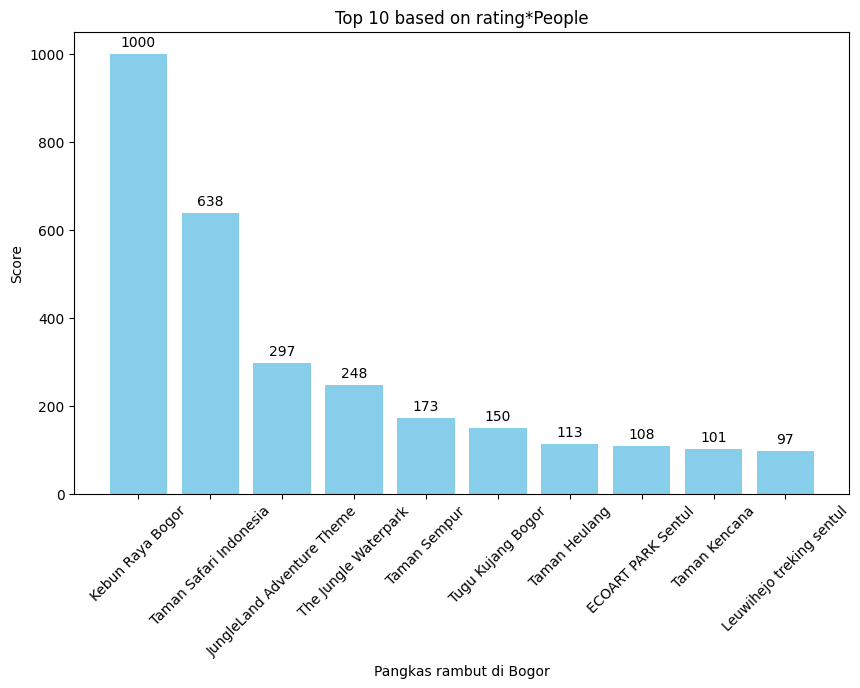

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))

#-------------------------------------------------------------------vvv------Ambil 3 kata pada kolom nama
bars = plt.bar(sortedData['nama'].apply(lambda x: ' '.join(x.split()[:3])), sortedData['ratingsReviewers'], color='skyblue')

# Menambahkan nilai 'ratingsPeople' di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Menambahkan label dan judul
plt.xlabel('Pangkas rambut di Bogor')
plt.ylabel('Score')
plt.title('Top 10 based on rating*People')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()